<a href="https://colab.research.google.com/github/jimmy-pink/computer-science-manual/blob/main/Machine%20Learning/Coursera-Tensorflow-C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⚜️ 《C2 Convolutional Neural Network》

## W1 探索更大的数据集



### 过度拟合 Overfitting
训练数据集过于接近， 以致于模型在预测新数据时准确率不高。

## W2 数据增强 Data Augmentation

### 数据清洗 Data Cleansing

| 任务 | 说明 | 处理方法 |
|------|------|---------|
| **缺失值处理** | 数据集中某些特征缺失 | - 删除缺失值数据<br>- 用均值/中位数/众数填充<br>- 使用插值法或模型预测填充 |
| **重复数据去除** | 数据集中存在完全相同的记录 | - 通过唯一标识去重<br>- 计算相似度合并相近记录 |
| **异常值检测** | 数据中存在明显偏离正常范围的值 | - 使用统计方法（如 Z-score）识别异常值<br>- 采用 IQR（四分位距）法去除异常点 |
| **数据一致性** | 数据格式不统一，如日期格式不同 | - 统一数据格式（如 `YYYY-MM-DD`）<br>- 处理大小写、单位转换 |
| **数据标准化与归一化** | 数据分布范围不均匀，影响模型训练 | - 归一化（Min-Max 归一化）<br>- 标准化（Z-score 标准化） |
| **噪声数据处理** | 数据中包含无效或无意义的信息 | - 过滤无关特征<br>- 使用平滑技术（如移动平均） |

  

### 数据增强
  
一种用于提升机器学习和深度学习模型泛化能力的技术。简单来说，就是在不增加训练数据规模的情况下，通过对数据增强来减少训练数据的Overfit。  
它通过对原始数据进行一定的变换或合成，生成更多的数据样本，以减少模型对特定数据分布的过拟合，提高模型的健壮性。

为什么数据增强后，训练很慢？  
因为数据预处理(如旋转、缩放)花费CPU资源。  

图像增强是在内存中完成的，增强的图像不会存储到磁盘。
  
| 应用场景 | 常见方法 | 示例 |
|----------|----------|------|
| **计算机视觉（CV）** | 旋转、翻转、裁剪、缩放、亮度/对比度调整、高斯噪声、模糊、仿射变换、GAN 生成新样本 | 图像分类、目标检测、OCR 识别 |
| **自然语言处理（NLP）** | 同义词替换、随机删除/插入/交换单词、反向翻译、生成式模型（GPT）生成新文本 | 情感分析、文本分类、机器翻译 |
| **语音信号处理（ASR）** | 时间缩放或拉伸、添加背景噪声、语音合成 | 语音识别、语音合成 |  

**【Rotate】**旋转左边的图像作为训练素材，使得模型可以准确预测右边的猫。  
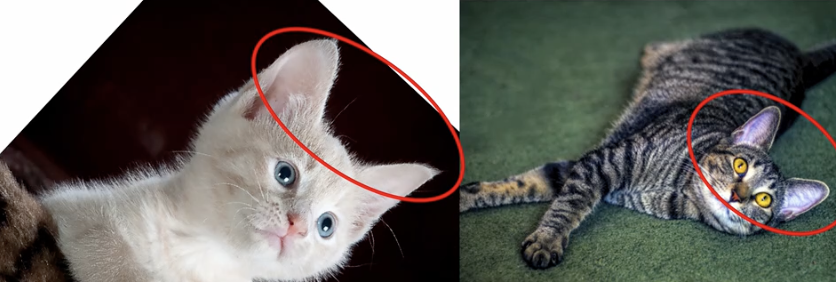

**【Flip】**水平翻转左边的照片作为训练素材，使模型可以预测右边的人像。  
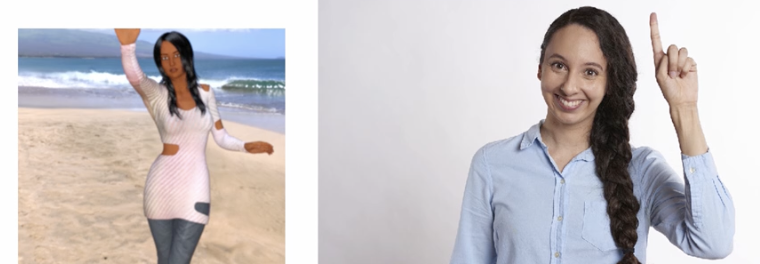

**【Zoom】** 局部缩放  
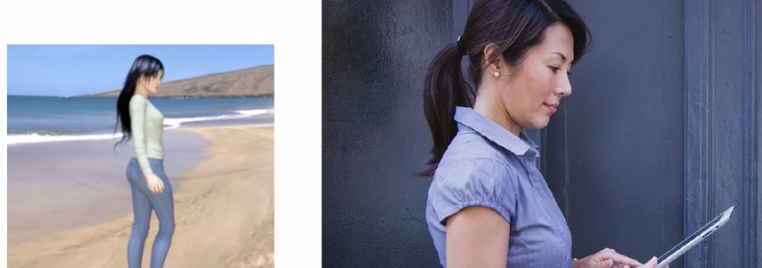

In [ ]:
 import tensorflow as tf

 fill_mode = "nearest" #填充模型，用于增加图像时填充丢失的信息，使用最近的像素填充
 augment_factor = 0.2 #增强因子，0-0.5之间，旋转时正负0.5代表-180到180度, 绽放，平移也是如此
 model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(120,120,3)),
    # 图像增强
    tf.keras.layers.RandomFlip('horizontal'), # 水平翻转
    tf.keras.layers.RandomRotation(augment_factor, fill_mode = fill_mode), # 旋转
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode = fill_mode), # 平移
    tf.keras.layers.RandomZoom(augment_factor, fill_mode=fill_mode), # 缩放
    tf.keras.layers.RandomContrast(0.1), #增加对比度

    tf.keras.layers.Rescaling(1./255), #归一化
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3), # 正则化 按比例随机丢弃一些神经元，1迫使模型每次训练时使用不同的神经元组合来学习；2避免某些神经元过度依赖上一层的输入，避免专注于某些特征
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## W3 迁移学习 Transfer Learning
基于一个已存在的模型，训练出一个新模型。


### 随机失活 Dropout
按比例随机丢弃一些神经元。  
作用：
- 迫使模型每次训练时使用不同的神经元组合来学习
- 防止某些神经元过度依赖上一层输入，避免专注于某些特征


### 张量 Tensor
输出张量有哪些：
- 特征图 Feature Map
- 分类概率 Class Probability
- 回归值  Regression Values
- 序列数据 Sequence Data


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt


path = kagglehub.dataset_download("sanikamal/horses-or-humans-dataset")
base_dir = path + "/horse-or-human"
# Prepare the training set
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir + "/train",
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    ).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Prepare the validation set
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir+"/validation",
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    ).cache().prefetch(tf.data.AUTOTUNE)

# Set the weights file you downloaded into a variable
local_weights_file = './model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# TensorFlow 中实现的预训练的 InceptionV3 模型，广泛应用于图像识别
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False, # 是否包含InceptionV3模型的最后一层，即分类层，为False可自定义分类层
    weights = 'imagenet') # 加载预训练数据的权重

# 加载预训练的基层模型
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
pre_trained_model.trainable = False # 等价于下面循环设置
#for layer in pre_trained_model.layers:
#    layer.trainable = False
pre_trained_model.summary()


# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output # 获取mixed7这一神经网络层的输出给下一层的结果

# 把上一个模型的输出结果 传递给flatten层，得到结果x，x可以理解为计算过程的张量
x = tf.keras.layers.Flatten()(last_output)
# 将x传递给致密层，得到结果再赋值给x
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)

# 以上过程，可能理解为在定义新的神经网络层
# Append the dense network to the base model。输出层来自pre_trained_model， 输入层也必须来自pre_trained_model
model = tf.keras.Model(pre_trained_model.input, x)


# 模型增强
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomZoom(0.2),
    ])

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)

model_with_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])
history = model_with_aug.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 20,
    verbose = 2)

## W4 多级分类 Multi-Class Classification


In [ ]:
# 石头 剪刀 布
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical",
).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical",
).cache().prefetch(tf.data.AUTOTUNE)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model_with_aug.fit(
    train_dataset,
    epochs=25,
    validation_data = validation_dataset,
    verbose = 1
)